In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
df=pd.read_csv(r'C:\Users\Lenovo\Downloads\data set\Student Mental Health Analysis During Online Learning.csv')
df

,Name,Gender,Age,Education Level,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
0,Aarav,Male,15,Class 8,7.1,8.9,9.3,Medium,No,Same
1,Meera,Female,25,MSc,3.3,5.0,0.2,Medium,No,Same
2,Ishaan,Male,20,BTech,9.5,5.4,6.2,Medium,No,Same
3,Aditya,Male,20,BA,10.8,5.6,5.5,High,Yes,Same
4,Anika,Female,17,Class 11,2.8,5.4,3.1,Medium,Yes,Same
...,...,...,...,...,...,...,...,...,...,...
995,Diya,Female,26,MA,11.3,6.8,9.1,Medium,No,Same
996,Aarav,Male,20,BTech,5.5,6.7,6.8,Low,Yes,Same
997,Myra,Female,15,Class 9,7.1,4.1,1.9,Low,Yes,Declined
998,Myra,Female,20,BA,4.4,7.5,4.5,Medium,No,Improved


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          1000 non-null   object 
 1   Gender                        1000 non-null   object 
 2   Age                           1000 non-null   int64  
 3   Education Level               1000 non-null   object 
 4   Screen Time (hrs/day)         1000 non-null   float64
 5   Sleep Duration (hrs)          1000 non-null   float64
 6   Physical Activity (hrs/week)  1000 non-null   float64
 7   Stress Level                  1000 non-null   object 
 8   Anxious Before Exams          1000 non-null   object 
 9   Academic Performance Change   1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


In [6]:
df.isnull().sum()

Name                            0
Gender                          0
Age                             0
Education Level                 0
Screen Time (hrs/day)           0
Sleep Duration (hrs)            0
Physical Activity (hrs/week)    0
Stress Level                    0
Anxious Before Exams            0
Academic Performance Change     0
dtype: int64

In [7]:
df=df.drop(['Name'],axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        1000 non-null   object 
 1   Age                           1000 non-null   int64  
 2   Education Level               1000 non-null   object 
 3   Screen Time (hrs/day)         1000 non-null   float64
 4   Sleep Duration (hrs)          1000 non-null   float64
 5   Physical Activity (hrs/week)  1000 non-null   float64
 6   Stress Level                  1000 non-null   object 
 7   Anxious Before Exams          1000 non-null   object 
 8   Academic Performance Change   1000 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 70.4+ KB


In [9]:
df['Academic Performance Change'].value_counts()

Academic Performance Change
Same        399
Improved    303
Declined    298
Name: count, dtype: int64

In [10]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Education Level']=le.fit_transform(df['Education Level'])
df['Stress Level']=le.fit_transform(df['Stress Level'])
df['Anxious Before Exams']=le.fit_transform(df['Anxious Before Exams'])
df['Academic Performance Change']=le.fit_transform(df['Academic Performance Change'])

In [11]:
from imblearn.under_sampling import RandomUnderSampler
x=df.drop(columns="Academic Performance Change",axis=1)
y=df["Academic Performance Change"]
smote=RandomUnderSampler(sampling_strategy="majority")
rus=RandomUnderSampler(sampling_strategy="majority")
x_sm,y_sm=rus.fit_resample(x,y)
x_sm.shape,y_sm.shape

((899, 8), (899,))

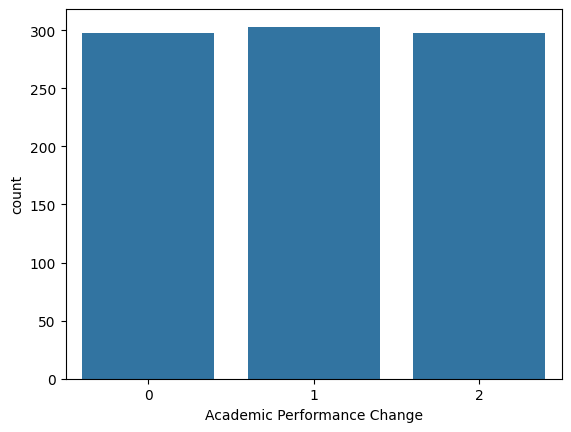

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=y_sm)
plt.show()

In [13]:
x=df.drop('Academic Performance Change',axis=1)
y=df['Academic Performance Change']

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.36
[[ 7 10 46]
 [ 9  8 41]
 [11 11 57]]
              precision    recall  f1-score   support

           0       0.26      0.11      0.16        63
           1       0.28      0.14      0.18        58
           2       0.40      0.72      0.51        79

    accuracy                           0.36       200
   macro avg       0.31      0.32      0.28       200
weighted avg       0.32      0.36      0.30       200



In [17]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.66
[[33  4 26]
 [ 7 27 24]
 [ 5  2 72]]
              precision    recall  f1-score   support

           0       0.73      0.52      0.61        63
           1       0.82      0.47      0.59        58
           2       0.59      0.91      0.72        79

    accuracy                           0.66       200
   macro avg       0.71      0.63      0.64       200
weighted avg       0.70      0.66      0.65       200



In [20]:
from sklearn.svm import SVC
model=SVC(C=200,kernel="rbf",gamma=0.0,shrinking=True)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.395
[[ 0  0 63]
 [ 0  0 58]
 [ 0  0 79]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.00      0.00      0.00        58
           2       0.40      1.00      0.57        79

    accuracy                           0.40       200
   macro avg       0.13      0.33      0.19       200
weighted avg       0.16      0.40      0.22       200



C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [21]:
from sklearn.svm import SVC
model=SVC(C=200,kernel="rbf",gamma=0.0,shrinking=True)
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.395
[[ 0  0 63]
 [ 0  0 58]
 [ 0  0 79]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.00      0.00      0.00        58
           2       0.40      1.00      0.57        79

    accuracy                           0.40       200
   macro avg       0.13      0.33      0.19       200
weighted avg       0.16      0.40      0.22       200



C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [27]:
from sklearn.model_selection import GridSearchCV
param={"C":[0.1,1,10,50,100,500],"gamma":[1,0.5,0.1,0.01,0.001]}
grid=GridSearchCV(SVC(),param,refit=True,verbose=2)
grid.fit(x_train,y_train)
grid_pred=grid.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,grid_pred))
print(confusion_matrix(y_test,grid_pred))
print(classification_report(y_test,grid_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.5; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.5; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.5; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.5; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.5; total time=   0.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [28]:

from sklearn.model_selection import GridSearchCV
param={"C":[0.1,1,10,50,100,500],"gamma":[1,0.5,0.1,0.01,0.001]}
grid=GridSearchCV(SVC(),param,refit=True,verbose=2)
grid.fit(x_test,y_test)
grid_pred=grid.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,grid_pred))
print(confusion_matrix(y_test,grid_pred))
print(classification_report(y_test,grid_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.5; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.5; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.5; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.5; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.5; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0

In [30]:
from sklearn.model_selection import RandomizedSearchCV
param={"C":[0.1,1,10,50,100,500],"gamma":[1,0.5,0.1,0.01,0.001]}
random=RandomizedSearchCV(SVC(),param,refit=True,verbose=8)
random.fit(x_train,y_train)
random_pred=random.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,random_pred))
print(confusion_matrix(y_test,random_pred))
print(classification_report(y_test,random_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...................C=10, gamma=0.5;, score=0.338 total time=   0.1s
[CV 2/5] END ...................C=10, gamma=0.5;, score=0.362 total time=   0.0s
[CV 3/5] END ...................C=10, gamma=0.5;, score=0.312 total time=   0.1s
[CV 4/5] END ...................C=10, gamma=0.5;, score=0.281 total time=   0.0s
[CV 5/5] END ...................C=10, gamma=0.5;, score=0.369 total time=   0.0s
[CV 1/5] END ..................C=500, gamma=0.5;, score=0.331 total time=   0.0s
[CV 2/5] END ..................C=500, gamma=0.5;, score=0.369 total time=   0.0s
[CV 3/5] END ..................C=500, gamma=0.5;, score=0.312 total time=   0.0s
[CV 4/5] END ..................C=500, gamma=0.5;, score=0.275 total time=   0.3s
[CV 5/5] END ..................C=500, gamma=0.5;, score=0.369 total time=   0.0s
[CV 1/5] END ..................C=100, gamma=0.5;, score=0.331 total time=   0.0s
[CV 2/5] END ..................C=100, gamma=0.5;

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [31]:
from sklearn.model_selection import RandomizedSearchCV
param={"C":[0.1,1,10,50,100,500],"gamma":[1,0.5,0.1,0.01,0.001]}
random=RandomizedSearchCV(SVC(),param,refit=True,verbose=8)
random.fit(x_test,y_test)
random_pred=random.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,random_pred))
print(confusion_matrix(y_test,random_pred))
print(classification_report(y_test,random_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....................C=100, gamma=1;, score=0.400 total time=   0.0s
[CV 2/5] END ....................C=100, gamma=1;, score=0.350 total time=   0.0s
[CV 3/5] END ....................C=100, gamma=1;, score=0.300 total time=   0.0s
[CV 4/5] END ....................C=100, gamma=1;, score=0.400 total time=   0.0s
[CV 5/5] END ....................C=100, gamma=1;, score=0.250 total time=   0.0s
[CV 1/5] END ................C=500, gamma=0.001;, score=0.350 total time=   0.0s
[CV 2/5] END ................C=500, gamma=0.001;, score=0.400 total time=   0.0s
[CV 3/5] END ................C=500, gamma=0.001;, score=0.400 total time=   0.1s
[CV 4/5] END ................C=500, gamma=0.001;, score=0.525 total time=   0.0s
[CV 5/5] END ................C=500, gamma=0.001;, score=0.275 total time=   0.1s
[CV 1/5] END ..................C=500, gamma=0.5;, score=0.325 total time=   0.0s
[CV 2/5] END ..................C=500, gamma=0.5;

boosting _ underfit 

In [33]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(estimator=SVC(probability=True),n_estimators=200)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.395
[[ 0  0 63]
 [ 0  0 58]
 [ 0  0 79]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.00      0.00      0.00        58
           2       0.40      1.00      0.57        79

    accuracy                           0.40       200
   macro avg       0.13      0.33      0.19       200
weighted avg       0.16      0.40      0.22       200



C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [34]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(estimator=SVC(probability=True),n_estimators=200)
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.395
[[ 0  0 63]
 [ 0  0 58]
 [ 0  0 79]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.00      0.00      0.00        58
           2       0.40      1.00      0.57        79

    accuracy                           0.40       200
   macro avg       0.13      0.33      0.19       200
weighted avg       0.16      0.40      0.22       200



C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [36]:
import xgboost as cgb
model=cgb.XGBClassifier(n_estimators=100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.335
[[20 23 20]
 [17 19 22]
 [18 33 28]]
              precision    recall  f1-score   support

           0       0.36      0.32      0.34        63
           1       0.25      0.33      0.29        58
           2       0.40      0.35      0.38        79

    accuracy                           0.34       200
   macro avg       0.34      0.33      0.33       200
weighted avg       0.35      0.34      0.34       200



In [37]:
import xgboost as cgb
model=cgb.XGBClassifier(n_estimators=100)
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[63  0  0]
 [ 0 58  0]
 [ 0  0 79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        79

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [38]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.325
[[16 15 32]
 [12 18 28]
 [20 28 31]]
              precision    recall  f1-score   support

           0       0.33      0.25      0.29        63
           1       0.30      0.31      0.30        58
           2       0.34      0.39      0.36        79

    accuracy                           0.33       200
   macro avg       0.32      0.32      0.32       200
weighted avg       0.33      0.33      0.32       200



In [39]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=100)
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


1.0
[[63  0  0]
 [ 0 58  0]
 [ 0  0 79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        79

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [40]:
from catboost import CatBoostClassifier
model=CatBoostClassifier(n_estimators=100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Learning rate set to 0.5
0:	learn: 1.0644305	total: 214ms	remaining: 21.2s
1:	learn: 1.0343406	total: 225ms	remaining: 11s
2:	learn: 1.0068244	total: 352ms	remaining: 11.4s
3:	learn: 0.9832757	total: 368ms	remaining: 8.83s
4:	learn: 0.9720766	total: 378ms	remaining: 7.18s
5:	learn: 0.9519583	total: 385ms	remaining: 6.03s
6:	learn: 0.9437272	total: 393ms	remaining: 5.23s
7:	learn: 0.9267929	total: 531ms	remaining: 6.11s
8:	learn: 0.9164033	total: 543ms	remaining: 5.49s
9:	learn: 0.9023881	total: 549ms	remaining: 4.94s
10:	learn: 0.8898669	total: 555ms	remaining: 4.49s
11:	learn: 0.8731028	total: 566ms	remaining: 4.15s
12:	learn: 0.8557310	total: 691ms	remaining: 4.62s
13:	learn: 0.8439369	total: 704ms	remaining: 4.32s
14:	learn: 0.8309417	total: 711ms	remaining: 4.03s
15:	learn: 0.8188606	total: 721ms	remaining: 3.79s
16:	learn: 0.8041720	total: 727ms	remaining: 3.55s
17:	learn: 0.7963145	total: 741ms	remaining: 3.38s
18:	learn: 0.7797140	total: 747ms	remaining: 3.18s
19:	learn: 0.76993

In [41]:
from catboost import CatBoostClassifier
model=CatBoostClassifier(n_estimators=100)
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Learning rate set to 0.5
0:	learn: 1.0333814	total: 5.95ms	remaining: 590ms
1:	learn: 0.9847972	total: 15ms	remaining: 737ms
2:	learn: 0.9279849	total: 22.3ms	remaining: 722ms
3:	learn: 0.8824596	total: 31.2ms	remaining: 749ms
4:	learn: 0.8284987	total: 66.4ms	remaining: 1.26s
5:	learn: 0.7873864	total: 70.8ms	remaining: 1.11s
6:	learn: 0.7524298	total: 79.2ms	remaining: 1.05s
7:	learn: 0.7333083	total: 86.9ms	remaining: 999ms
8:	learn: 0.7187616	total: 95.7ms	remaining: 968ms
9:	learn: 0.6952552	total: 101ms	remaining: 905ms
10:	learn: 0.6649874	total: 392ms	remaining: 3.17s
11:	learn: 0.6430330	total: 403ms	remaining: 2.96s
12:	learn: 0.6086987	total: 408ms	remaining: 2.73s
13:	learn: 0.5705859	total: 413ms	remaining: 2.53s
14:	learn: 0.5435454	total: 422ms	remaining: 2.39s
15:	learn: 0.5203038	total: 426ms	remaining: 2.24s
16:	learn: 0.4968980	total: 430ms	remaining: 2.1s
17:	learn: 0.4768676	total: 435ms	remaining: 1.98s
18:	learn: 0.4593603	total: 439ms	remaining: 1.87s
19:	learn: